In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import statsmodels.formula.api as sm

In [5]:
base = pd.read_csv('cars.csv')
base.shape

(50, 3)

In [6]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [7]:
base = base.drop(['Unnamed: 0'], axis = 1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [8]:
x = base.iloc[:, 1].values
y = base.iloc[:, 0].values
x

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85], dtype=int64)

In [15]:
correlacao = np.corrcoef(x, y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [16]:
x = x.reshape(-1, 1)
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [17]:
modelo.intercept_

8.28390564178717

In [18]:
modelo.coef_

array([0.16556757])

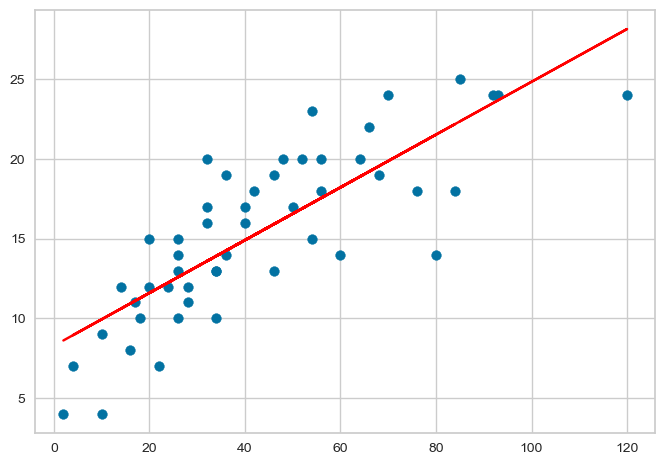

In [19]:
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color = 'red')

In [20]:
modelo.intercept_ + modelo.coef_ * 22

array([11.92639228])

In [21]:
modelo.predict([[22]])

array([11.92639228])

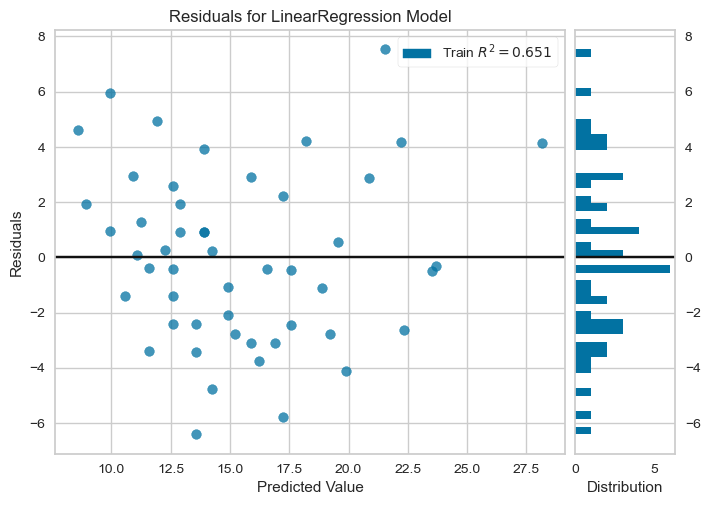

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [22]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(x, y)
visualizador.poof()

In [46]:
base = pd.read_csv('mt_cars.csv')
base.shape

(32, 12)

In [47]:
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [56]:
base = base.drop(['Unnamed: 0'], axis = 1)

In [32]:
x = base.iloc[:, 2].values
y = base.iloc[:, 0].values
correlacao = np.corrcoef(x, y)
correlacao

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [48]:
x = x.reshape(-1, 1)

In [36]:
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [39]:
modelo.intercept_

29.59985475616395

In [41]:
modelo.coef_

array([-0.04121512])

In [42]:
modelo.score(x, y)

0.7183433404897299

In [44]:
previsoes = modelo.predict(x)
previsoes

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

In [50]:
modelo_ajustado = sm.ols(formula = 'mpg ~ disp', data = base)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           9.38e-10
Time:                        12:28:29   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

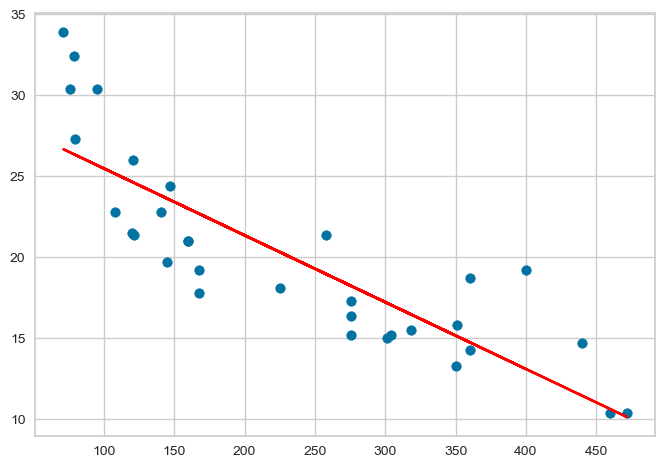

In [51]:
plt.scatter(x, y)
plt.plot(x, previsoes, color = 'red')

In [52]:
modelo.predict([[200]])

array([21.35683076])

In [63]:
x1 = base.iloc[:, 1:4].values
x1

array([[  6. , 160. , 110. ],
       [  6. , 160. , 110. ],
       [  4. , 108. ,  93. ],
       [  6. , 258. , 110. ],
       [  8. , 360. , 175. ],
       [  6. , 225. , 105. ],
       [  8. , 360. , 245. ],
       [  4. , 146.7,  62. ],
       [  4. , 140.8,  95. ],
       [  6. , 167.6, 123. ],
       [  6. , 167.6, 123. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 472. , 205. ],
       [  8. , 460. , 215. ],
       [  8. , 440. , 230. ],
       [  4. ,  78.7,  66. ],
       [  4. ,  75.7,  52. ],
       [  4. ,  71.1,  65. ],
       [  4. , 120.1,  97. ],
       [  8. , 318. , 150. ],
       [  8. , 304. , 150. ],
       [  8. , 350. , 245. ],
       [  8. , 400. , 175. ],
       [  4. ,  79. ,  66. ],
       [  4. , 120.3,  91. ],
       [  4. ,  95.1, 113. ],
       [  8. , 351. , 264. ],
       [  6. , 145. , 175. ],
       [  8. , 301. , 335. ],
       [  4. , 121. , 109. ]])

In [64]:
y1 = base.iloc[:, 0].values
modelo2 = LinearRegression()
modelo2.fit(x1, y1)
modelo2.score(x1, y1)

0.7678877440928638

In [65]:
modelo_ajustado2 = sm.ols(formula = 'mpg ~ cyl + disp + hp', data = base)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           5.05e-09
Time:                        12:40:48   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
novo = np.array([4, 200, 100])
novo = novo.reshape(1, -1)
modelo2.predict(novo)

array([24.03968887])